Button(description='Generate Plot', style=ButtonStyle())

<IPython.core.display.Javascript object>


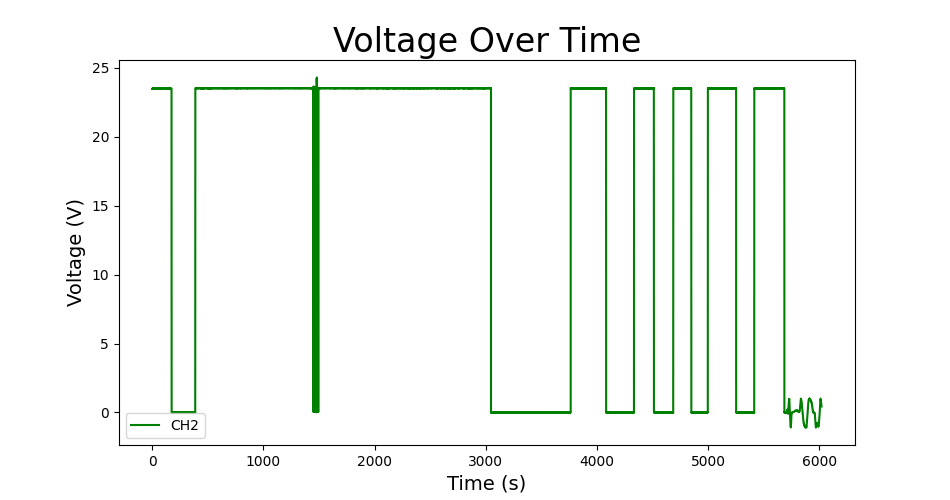

In [1]:
"""
Graph Voltage

Description: Graph voltage from CH1, CH2, CH4

Author: Nic La
Last modified: May 2022
"""

from ipywidgets import widgets, Layout, HBox, VBox
import csv
import matplotlib.pyplot as plt
%matplotlib notebook


def open_csv():
    """Open CSV file and x_values, y1_values, y2_values, y3_values"""
    # Initialize variables
    date_file = 'input.CSV'
    raw = []
    x_values, y1_values, y2_values, y3_values = [], [], [], []

    # Open csv
    with open(date_file) as in_file:
        reader = csv.reader(in_file, delimiter=',')
        for row in reader:
            raw.append(row)
    
    # Assign first row to header
    x_header, y1_header, y2_header, y3_header = raw[0]
    
    # Assign remaining rows to x, y1, y2, y3
    for line in raw[1:]:
        x_values.append((float(line[0]) - 1) / 10)
        y1_values.append(float(line[1]))
        y2_values.append(float(line[2]))
        y3_values.append(float(line[3]))
    
    return x_header, y1_header, y2_header, y3_header, x_values, y1_values, y2_values, y3_values


def generate_plot(x_header, y1_header, y2_header, y3_header, x_values, y1_values, y2_values, y3_values, cb1_value, cb2_value, cb3_value):
    """Plot x, y1, y2, y3"""
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 9.5
    fig_size[1] = 5
    fig = plt.figure(1)
    fig.clear()
    ax1_1 = fig.add_subplot(111)
    # Plot scatter
    # plt.figure()
    # plt.scatter(x_values, y1_values, c='red', edgecolors='none', s=10, label=y1_header)
    # plt.scatter(x_values, y2_values, c='green', edgecolors='none', s=10, label=y2_header)
    # plt.scatter(x_values, y3_values, c='blue', edgecolors='none', s=10, label=y3_header)

    # Plot line
    # plt.figure(figsize=(9, 5), layout='constrained')
    if cb1_value:
        ax1_1.plot(x_values, y1_values, c='red', label=y1_header)
    if cb2_value:
        ax1_1.plot(x_values, y2_values, c='green', label=y2_header)
    if cb3_value:
        ax1_1.plot(x_values, y3_values, c='blue', label=y3_header)

    # Set chart title and label axis
    ax1_1.set_title("Voltage Over Time", fontsize=24)
    ax1_1.set_xlabel("Time (s)", fontsize=14)
    ax1_1.set_ylabel("Voltage (V)", fontsize=14)
    ax1_1.legend()

    # Set range for each axis
    # plt.axis([0, 1000, 23.4, 23.6])

    # plt.savefig('plot.png', bbox_inches='tight')  # bbox_inches trims excess white space
    # plt.show()
    fig.canvas.draw()


def button_click(button):
    generate_plot(x_header, y1_header, y2_header, y3_header, x_values, y1_values, y2_values, y3_values, cb1.value, cb2.value, cb3.value)


if __name__ == "__main__":
    x_header, y1_header, y2_header, y3_header, x_values, y1_values, y2_values, y3_values = open_csv()
    
    # Ch1 Selection
    lbl1 = widgets.Label(y1_header)
    cb1 = widgets.Checkbox(value=True)
    display(HBox([lbl1, cb1]))
    
    # Ch2 Selection
    lbl2 = widgets.Label(y2_header)
    cb2 = widgets.Checkbox(value=True)
    display(HBox([lbl2, cb2]))
    
    # Ch4 Selection
    lbl3 = widgets.Label(y3_header)
    cb3 = widgets.Checkbox(value=True)
    display(HBox([lbl3, cb3]))
    
    # Generate Plot
    btn = widgets.Button(description='Generate Plot')
    display(btn)
    btn.on_click(button_click)
    
